In [112]:
import pandas as pd
from matplotlib import pyplot as plt

In [113]:
results_csv = pd.read_csv("Resultados.csv")

In [114]:
results_csv

,Você reside em...,Você tem condições de se alimentar em outro lugar com frequência?,Você acha que se alimenta bem?,Quanto você gasta por refeição quando o bandejão não abre?,Você gosta de comer no bandejão?,Você almoça e janta no bandejão?,Você toma café da manhã no bandejão?,Você almoça no bandejão aos sábados?,Quantas vezes você janta no bandejão por semana?,Quantas vezes você almoça no bandejão por semana?
0,Casa,Sim,Sim,20 a 40 reais,Não,"Não, eu só almoço.",Não,Não,Nenhuma,1 a 3 vezes
1,Apartamento,Não,Sim,0 a 20 reais,Sim,Sim,Não,Sim,1 a 3 vezes,4 ou 5 vezes
2,Alojamento,Não,Sim,0 a 20 reais,Não,Sim,Sim,Sim,Todos os dias,Todos os dias
3,Apartamento,Não,Sim,20 a 40 reais,Sim,"Não, eu só almoço.",Não,Sim,NaN,Todos os dias
4,Apartamento,Não,Sim,20 a 40 reais,Sim,"Não, eu só almoço.",Não,Sim,1 a 3 vezes,Todos os dias
5,Casa,Não,Sim,0 a 20 reais,Sim,Sim,Não,Sim,Todos os dias,Todos os dias
6,Apartamento,Não,Sim,0 a 20 reais,Sim,Sim,Não,Sim,4 ou 5 vezes,4 ou 5 vezes
7,Apartamento,Sim,Não,20 a 40 reais,Sim,"Não, eu só almoço.",Não,Não,1 a 3 vezes,1 a 3 vezes
8,Apartamento,Não,Não,20 a 40 reais,Sim,Sim,Não,Não,1 a 3 vezes,1 a 3 vezes
9,Apartamento,Não,Sim,20 a 40 reais,Sim,Sim,Sim,Sim,Todos os dias,Todos os dias


In [115]:
aloja = results_csv.groupby('Você reside em...').get_group("Alojamento")
casa = results_csv.groupby('Você reside em...').get_group("Casa")
apartamento = results_csv.groupby('Você reside em...').get_group("Apartamento")
rep = results_csv.groupby('Você reside em...').get_group("República")
mods = [aloja, casa, apartamento, rep]

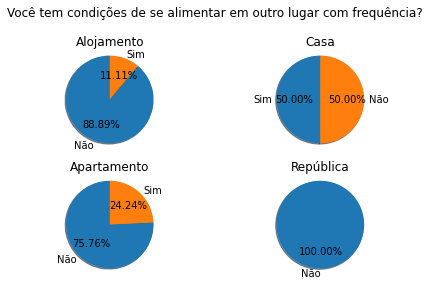

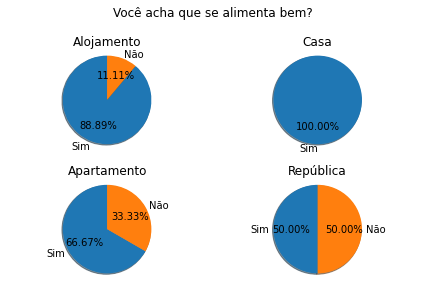

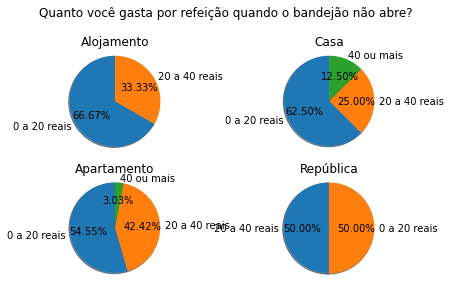

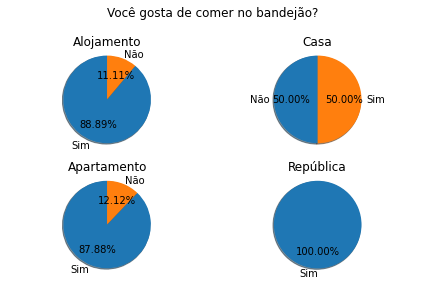

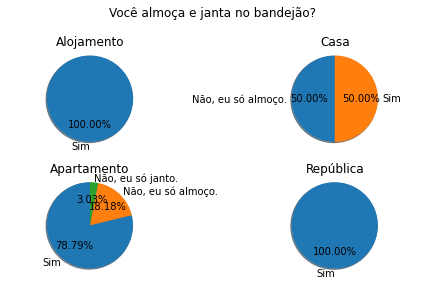

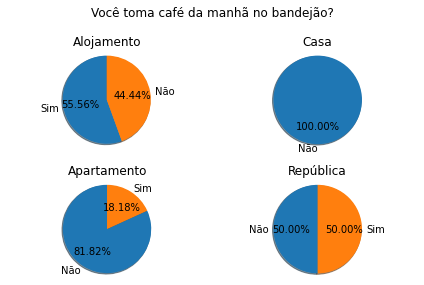

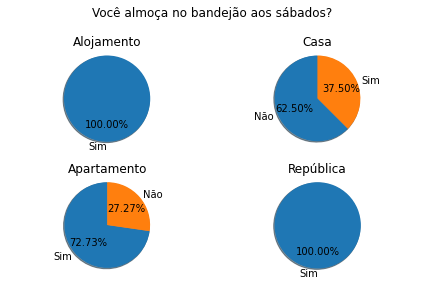

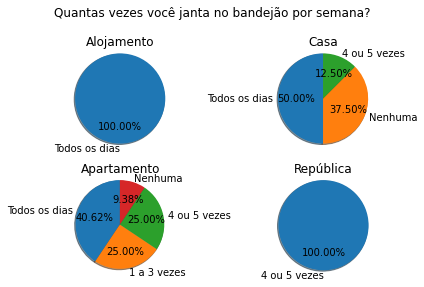

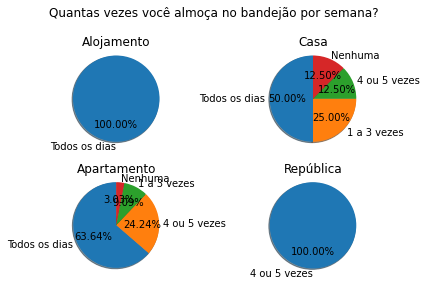

In [116]:
questions = ["Você tem condições de se alimentar em outro lugar com frequência?",
             "Você acha que se alimenta bem?",
             "Quanto você gasta por refeição quando o bandejão não abre?",
             "Você gosta de comer no bandejão?",
             "Você almoça e janta no bandejão?",
             "Você toma café da manhã no bandejão?",
             "Você almoça no bandejão aos sábados?",
             "Quantas vezes você janta no bandejão por semana?",
             "Quantas vezes você almoça no bandejão por semana?"]

for question in questions:
    fig, axs = plt.subplots(2,2)
    axs = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]
    fig.suptitle(question)

    for mod, ax in zip(mods, axs):
        data = mod[question].value_counts()
        
        labels = data.keys()
        sizes = data.values

        texts = ax.pie(sizes, labels=labels, autopct='%1.2f%%',
            shadow=True, startangle=90, textprops={'color':"black"})
        ax.axis('equal')
        ax.set_title(mod["Você reside em..."].values[0])

    plt.tight_layout()
    plt.show()
    print("\n")

In [117]:
rep.columns

Index(['Você reside em...',
       'Você tem condições de se alimentar em outro lugar com frequência?',
       'Você acha que se alimenta bem?',
       'Quanto você gasta por refeição quando o bandejão não abre?',
       'Você gosta de comer no bandejão?', 'Você almoça e janta no bandejão?',
       'Você toma café da manhã no bandejão?',
       'Você almoça no bandejão aos sábados?',
       'Quantas vezes você janta no bandejão por semana?',
       'Quantas vezes você almoça no bandejão por semana?'],
      dtype='object')

In [118]:
rep['Você tem condições de se alimentar em outro lugar com frequência?'].value_counts().keys()

Index(['Não'], dtype='object')

In [119]:
aloja["Você reside em..."].values[0]

'Alojamento'